In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Data Descriptions.

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

Target

- Needs to perform clustering to summarize customer segments.

Methods

- Performs clustering algorithims with K-Means and DBSCAN.


In [2]:
raw_data = pd.read_csv('marketing_campaign.csv', sep = '\t')
display(raw_data.head())
display(raw_data.tail())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

## Data Cleaning an Preparation

In [3]:
print("Data info :")
print("="*50)
print(raw_data.info())
print("="*50)

Data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 

In [4]:
print('Duplicated values :')
print("="*50)
print(raw_data.duplicated().sum())
print("="*50)

Duplicated values :
0


In [5]:
print("="*50)
print(f"Data shape = {raw_data.shape}")
raw_data.drop(columns = ['Z_CostContact','Z_Revenue'], inplace = True)
print(f"Data new shape = {raw_data.shape}")
print("="*50)

Data shape = (2240, 29)
Data new shape = (2240, 27)


In [6]:
raw_data['Dt_Customer'] = pd.to_datetime(raw_data['Dt_Customer'],format="%d-%m-%Y")
raw_data['Enroll_time'] = (pd.to_datetime('today') - raw_data['Dt_Customer']).dt.days/365
raw_data['Income'] = raw_data['Income'].fillna(value = np.mean(raw_data['Income']))
raw_data['Age'] = 2022 - raw_data['Year_Birth']
print(raw_data['Dt_Customer'].dtypes)

datetime64[ns]


## Exploratory Data Analysis

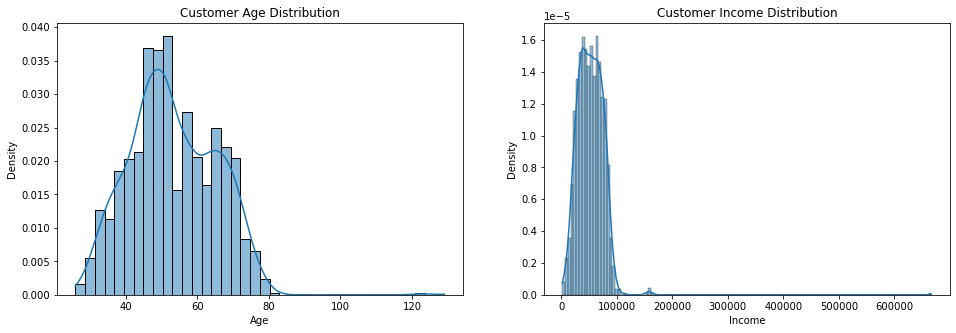

In [7]:
# Check The Customer Age Distribution 
fig, ax = plt.subplots(1,2 , figsize = (16,5))

sns.histplot(x = 'Age', data = raw_data,stat = 'density', kde = True, ax = ax[0])
ax[0].set_title('Customer Age Distribution')

sns.histplot(x = 'Income', data = raw_data,stat = 'density', kde = True, ax = ax[1])
ax[1].set_title('Customer Income Distribution')

plt.show()

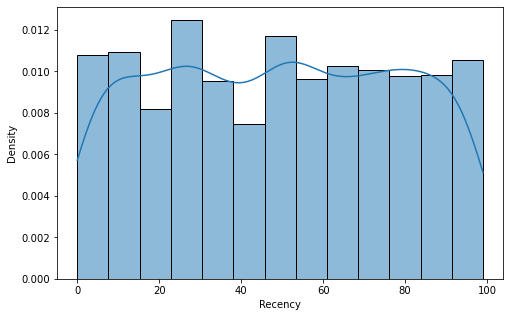

In [8]:
# days of the last Customer's Purchases Distribution
plt.figure(figsize = (8,5))
sns.histplot(x = 'Recency', data = raw_data, stat = 'density', kde = True)
plt.show()

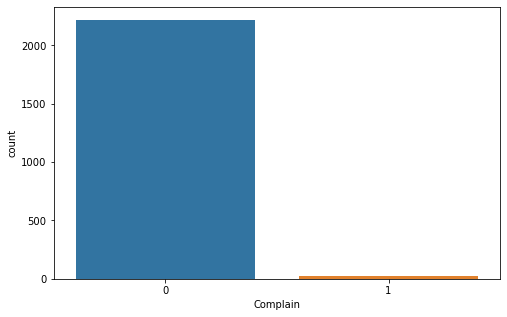

In [9]:
plt.figure(figsize = (8,5))
sns.countplot(x = "Complain", data = raw_data)
plt.show()

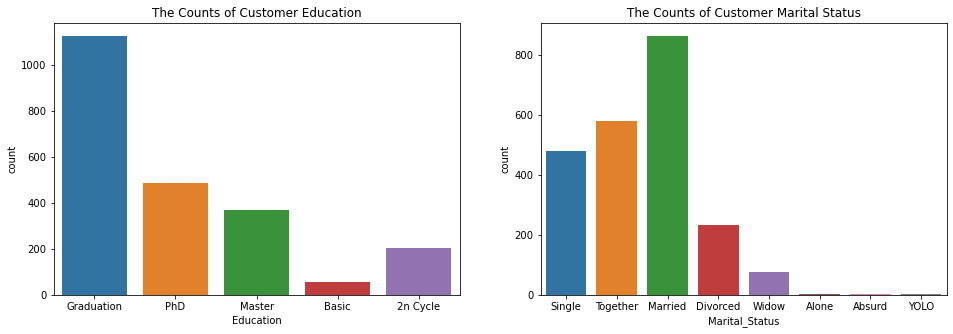

The Counts of Customer Education :
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
The Counts of Customer Marital Status :
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [10]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

sns.countplot(x = 'Education', data = raw_data, ax= ax[0])
ax[0].set_title('The Counts of Customer Education')

sns.countplot(x = 'Marital_Status', data = raw_data, ax = ax[1])
ax[1].set_title('The Counts of Customer Marital Status')

plt.show()
print("="*50)
print("The Counts of Customer Education :")
print(raw_data['Education'].value_counts(ascending = False))
print("="*50)
print("The Counts of Customer Marital Status :")
print(raw_data['Marital_Status'].value_counts(ascending = False))
print("="*50)


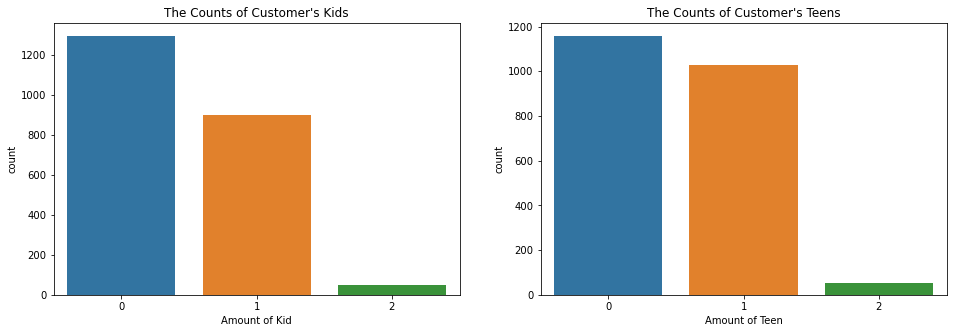

The Counts of Customer's Kids :
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
The Counts of Customer's Teens :
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


In [11]:
fig, ax = plt.subplots(1,2, figsize = (16,5))

sns.countplot(x = 'Kidhome', data = raw_data, ax= ax[0])
ax[0].set_title("The Counts of Customer's Kids")
ax[0].set_xlabel('Amount of Kid')

sns.countplot(x = 'Teenhome', data = raw_data, ax = ax[1])
ax[1].set_title("The Counts of Customer's Teens")
ax[1].set_xlabel('Amount of Teen')
plt.show()
print("="*50)
print("The Counts of Customer's Kids :")
print(raw_data['Kidhome'].value_counts(ascending = False))
print("="*50)
print("The Counts of Customer's Teens :")
print(raw_data['Teenhome'].value_counts(ascending = False))
print("="*50)

In [12]:
print(raw_data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Enroll_time', 'Age'],
      dtype='object')


In [13]:
# Statistics for amount of product purchases 

product_amt = raw_data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe().T
display(product_amt)

count        mean         std  min    25%    50%     75%  \
MntWines          2240.0  303.935714  336.597393  0.0  23.75  173.5  504.25   
MntFruits         2240.0   26.302232   39.773434  0.0   1.00    8.0   33.00   
MntMeatProducts   2240.0  166.950000  225.715373  0.0  16.00   67.0  232.00   
MntFishProducts   2240.0   37.525446   54.628979  0.0   3.00   12.0   50.00   
MntSweetProducts  2240.0   27.062946   41.280498  0.0   1.00    8.0   33.00   
MntGoldProds      2240.0   44.021875   52.167439  0.0   9.00   24.0   56.00   

                     max  
MntWines          1493.0  
MntFruits          199.0  
MntMeatProducts   1725.0  
MntFishProducts    259.0  
MntSweetProducts   263.0  
MntGoldProds       362.0

In [14]:
campaign_prop = raw_data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].describe().T
display(campaign_prop)

count      mean       std  min  25%  50%  75%  max
AcceptedCmp1  2240.0  0.064286  0.245316  0.0  0.0  0.0  0.0  1.0
AcceptedCmp2  2240.0  0.013393  0.114976  0.0  0.0  0.0  0.0  1.0
AcceptedCmp3  2240.0  0.072768  0.259813  0.0  0.0  0.0  0.0  1.0
AcceptedCmp4  2240.0  0.074554  0.262728  0.0  0.0  0.0  0.0  1.0
AcceptedCmp5  2240.0  0.072768  0.259813  0.0  0.0  0.0  0.0  1.0
Response      2240.0  0.149107  0.356274  0.0  0.0  0.0  0.0  1.0

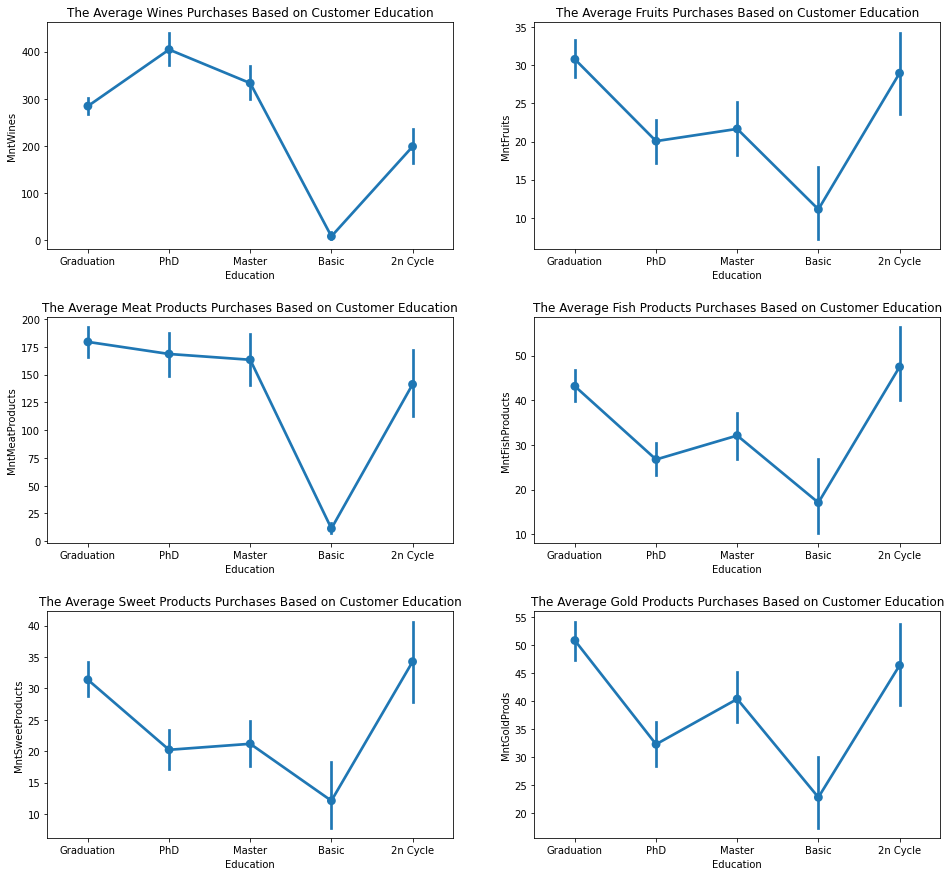

In [15]:
fig, ax = plt.subplots(3,2, figsize = (16,15))

sns.pointplot(x = 'Education', y = 'MntWines', data = raw_data, ax = ax[0,0])
ax[0,0].set_title("The Average Wines Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntFruits', data = raw_data, ax = ax[0,1])
ax[0,1].set_title("The Average Fruits Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntMeatProducts', data = raw_data, ax = ax[1,0])
ax[1,0].set_title("The Average Meat Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntFishProducts', data = raw_data, ax = ax[1,1])
ax[1,1].set_title("The Average Fish Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntSweetProducts', data = raw_data, ax = ax[2,0])
ax[2,0].set_title("The Average Sweet Products Purchases Based on Customer Education")

sns.pointplot(x = 'Education', y = 'MntGoldProds', data = raw_data, ax = ax[2,1])
ax[2,1].set_title("The Average Gold Products Purchases Based on Customer Education")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

plt.show()

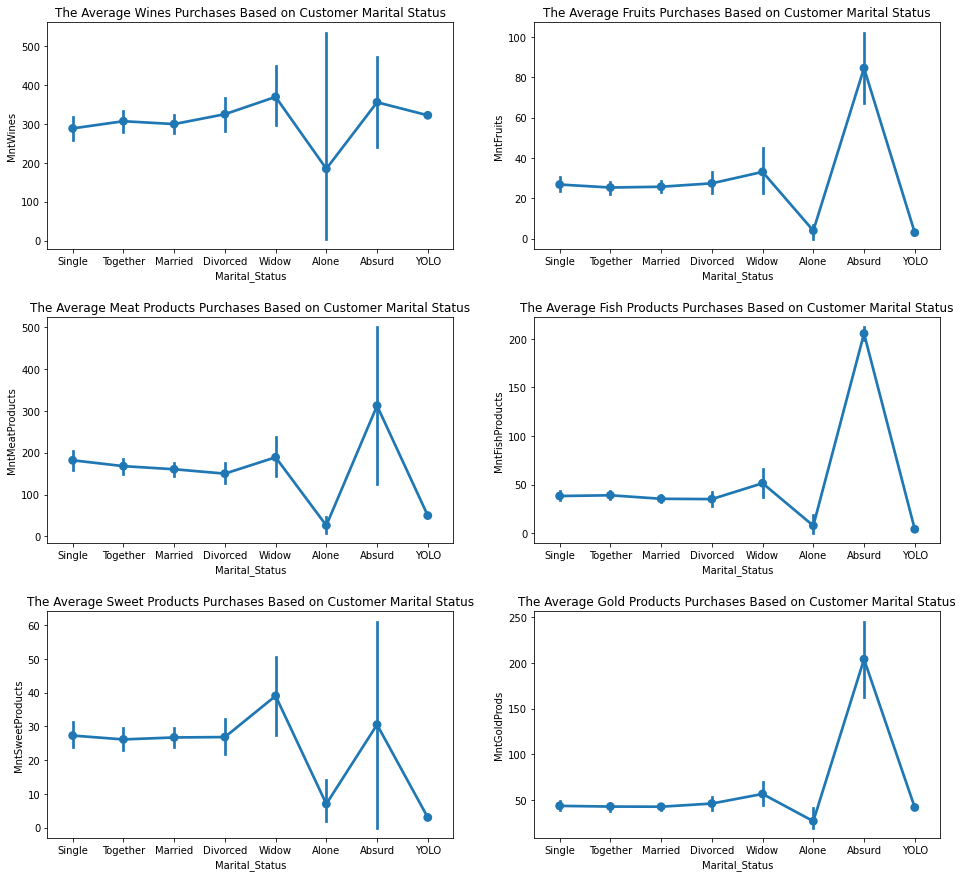

In [16]:
fig, ax = plt.subplots(3,2, figsize = (16,15))

sns.pointplot(x = 'Marital_Status', y = 'MntWines', data = raw_data, ax = ax[0,0])
ax[0,0].set_title("The Average Wines Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntFruits', data = raw_data, ax = ax[0,1])
ax[0,1].set_title("The Average Fruits Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntMeatProducts', data = raw_data, ax = ax[1,0])
ax[1,0].set_title("The Average Meat Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntFishProducts', data = raw_data, ax = ax[1,1])
ax[1,1].set_title("The Average Fish Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntSweetProducts', data = raw_data, ax = ax[2,0])
ax[2,0].set_title("The Average Sweet Products Purchases Based on Customer Marital Status")

sns.pointplot(x = 'Marital_Status', y = 'MntGoldProds', data = raw_data, ax = ax[2,1])
ax[2,1].set_title("The Average Gold Products Purchases Based on Customer Marital Status")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0.3)

plt.show()

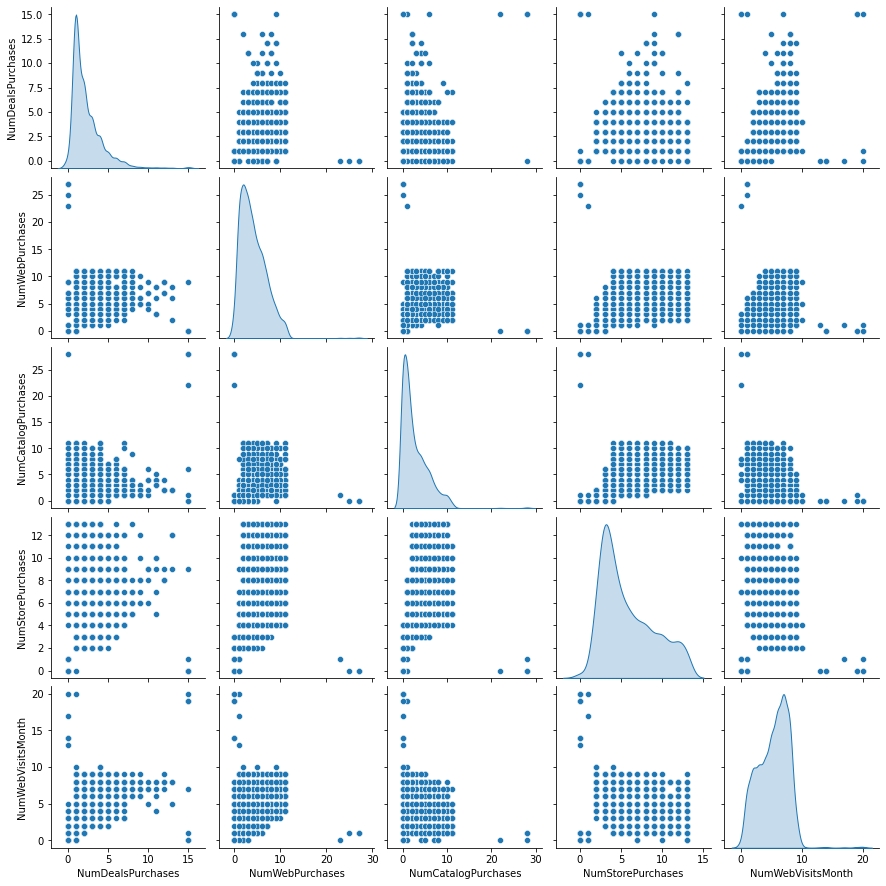

In [17]:
data_1 = raw_data.copy()[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
sns.pairplot(data_1,diag_kind = 'kde')
plt.show()

In [18]:
display(data_1.describe().T)

count      mean       std  min  25%  50%  75%   max
NumDealsPurchases    2240.0  2.325000  1.932238  0.0  1.0  2.0  3.0  15.0
NumWebPurchases      2240.0  4.084821  2.778714  0.0  2.0  4.0  6.0  27.0
NumCatalogPurchases  2240.0  2.662054  2.923101  0.0  0.0  2.0  4.0  28.0
NumStorePurchases    2240.0  5.790179  3.250958  0.0  3.0  5.0  8.0  13.0
NumWebVisitsMonth    2240.0  5.316518  2.426645  0.0  3.0  6.0  7.0  20.0

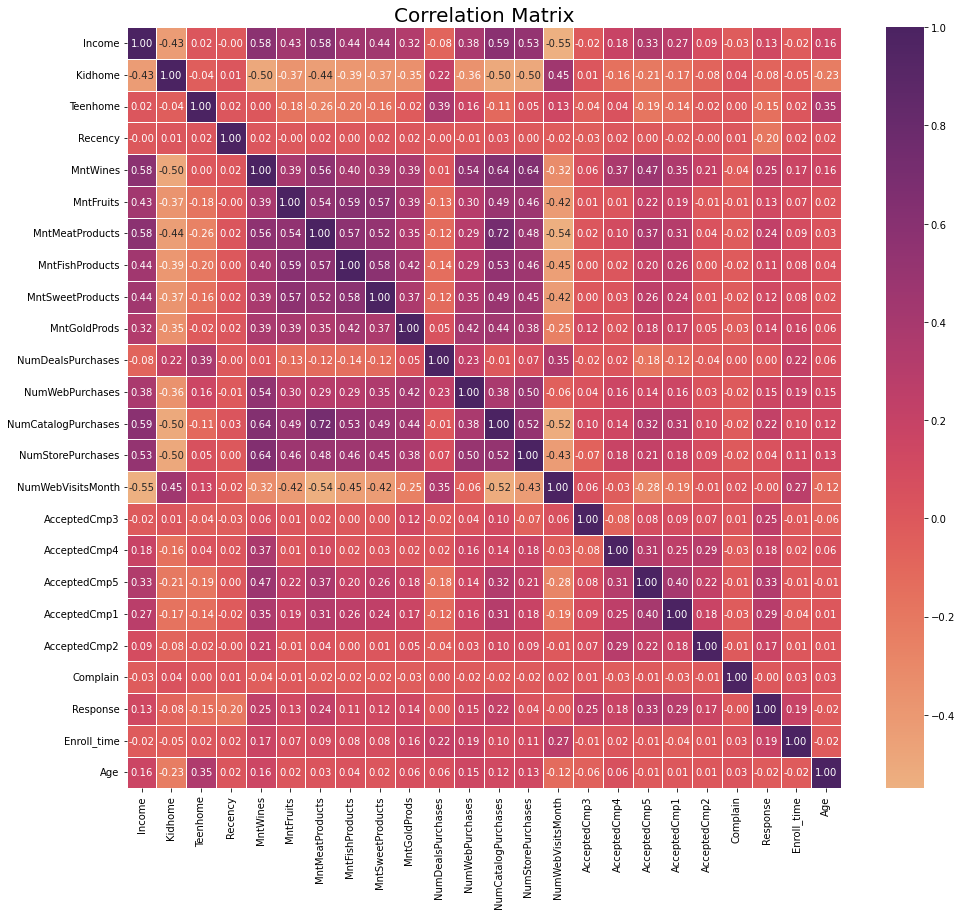

In [19]:
corr_ = raw_data.drop(columns = ['ID','Year_Birth']).corr()
fig,ax = plt.subplots(figsize = (16,14))
sns.heatmap(corr_,linewidths = 0.5,fmt = '.2f',cmap='flare',annot = True, ax = ax)
ax.set_title('Correlation Matrix', fontsize = 20)
plt.show()

## Data Preprocessing

In [20]:
print('Data Info')
print("="*50)
print(raw_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     22

In [21]:
new_data = pd.get_dummies(raw_data, drop_first=True)
print('Data Info')
print("="*50)
print(new_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds            

In [22]:
# drop the unnecessary columns
new_data.drop(columns = ['ID','Year_Birth','Dt_Customer'],inplace = True)
print('Data Info')
print("="*50)
print(new_data.info())
print("="*50)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMo

## Clustering Analysis

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [24]:
from plotly.offline import plot, iplot
import plotly.graph_objs as go
import plotly.express as px
from IPython.display import display

In [25]:
SS = StandardScaler()
data_scaled = SS.fit_transform(new_data.values)
print("="*50)
print('Scaled Data Shape :')
print(data_scaled.shape)
print("="*50)

Scaled Data Shape :
(2240, 35)


In [26]:
pca = PCA(random_state = 42)
reduced_data = pca.fit_transform(data_scaled)
explained_var_ratio = pca.explained_variance_ratio_
explained_var_ratio_cum = [explained_var_ratio[i] if i < 1 else np.sum(explained_var_ratio[:i+1]) for i in range(data_scaled.shape[1])]

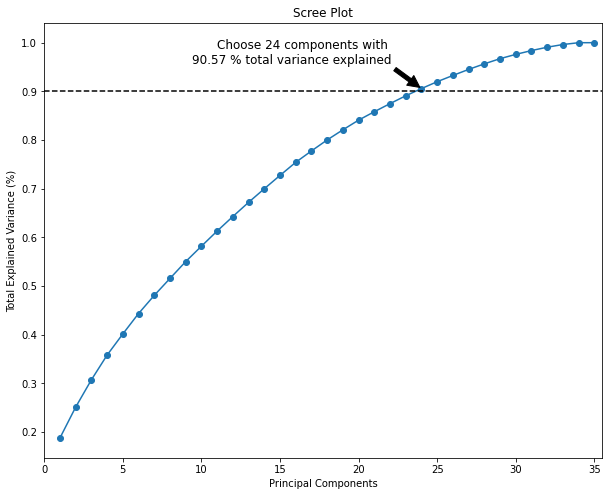

In [27]:
fig, ax  = plt.subplots(figsize = (10,8))
ax.plot(np.arange(1,data_scaled.shape[1] + 1), explained_var_ratio_cum, marker = 'o', label = '% Total Explained Variance')
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Components')
ax.set_ylabel('Total Explained Variance (%)')
ax.set_xlim((0,35.5))
ax.hlines(0.9,0,35.5, linestyle = 'dashed', color = 'black', label = '90 % Threshold')
ax.annotate(f'Choose 24 components with \n{np.round(explained_var_ratio_cum[23]*100,2)} % total variance explained', (24,explained_var_ratio_cum[23]), xytext=(-30, 50),textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 12, horizontalalignment='right', verticalalignment='top')
plt.show()

In [28]:
df_reduced = pd.DataFrame()
df_reduced[[f'Component {i}' for i in range(1,25)]] = reduced_data[:,:24]
display(df_reduced.head())

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     3.855239    -0.577620    -0.454112     2.785399    -1.153294   
1    -2.376877    -0.683315    -0.313370    -0.443056    -0.923229   
2     1.641727    -0.448726    -1.381110    -0.147130    -1.256176   
3    -2.511107    -1.643006    -0.094732     0.090102    -1.113346   
4    -0.504953     0.161109    -0.090472    -0.775592     1.826069   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0    -1.737762    -0.948770    -0.185758    -0.526639     -0.146659  ...   
1     0.835493    -1.993181    -0.950772    -0.453140      1.034326  ...   
2     0.733080     0.791637     0.815508     0.309797      0.489638  ...   
3     1.133091     0.938469     0.790398     0.436164      0.854565  ...   
4    -0.844091     0.023292     1.359123    -0.865183      0.426140  ...   

   Component 15  Component 16  Component 17  Component 18  Component 19  \
0     -0.685680     -0.031002     -0.072725      1.599410      1.244819   
1      0.362244     -0.249829     -0.863661      0.342281      0.906132   
2      0.264758     -0.905192      0.563815      0.027883     -1.100540   
3     -0.570205     -0.374017      0.185803     -0.846727     -0.557320   
4     -1.185217      0.915610     -0.063717     -1.631315      0.383775   

   Component 20  Component 21  Component 22  Component 23  Component 24  
0     -0.698156     -0.571049     -0.089100     -1.343725      1.146853  
1     -0.081687      0.134293     -0.437643     -0.112788      0.286856  
2     -0.267009     -0.310825      0.186014      0.196274      1.109261  
3      0.246090      0.053572      0.194312     -0.067329      0.332437  
4     -0.191838     -0.041022     -0.229050     -0.629759      0.425766  

[5 rows x 24 columns]

## Data Visualization Using TSNE on Reduced Data.

In [29]:
tsne = TSNE(n_components = 2, perplexity = 10, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



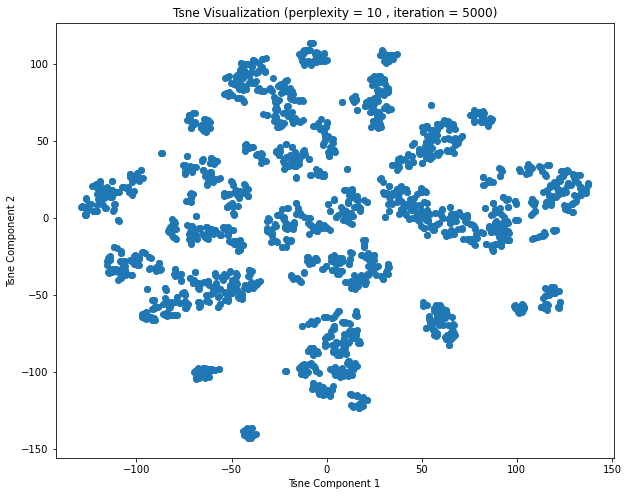

In [30]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 10 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

In [31]:
tsne = TSNE(n_components = 2, perplexity = 20, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



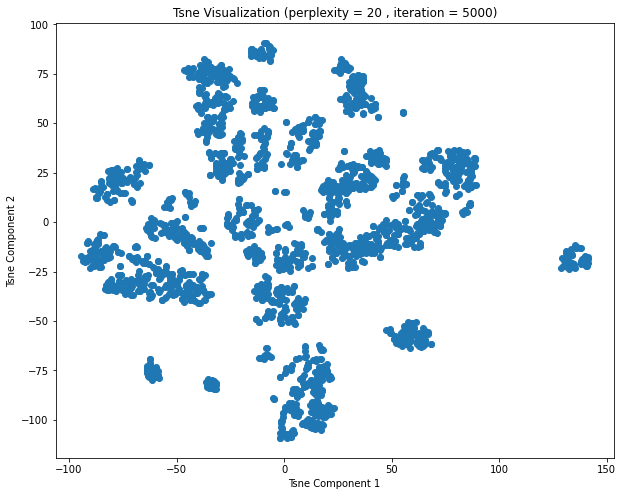

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 20 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

In [33]:
tsne = TSNE(n_components = 2, perplexity = 30, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



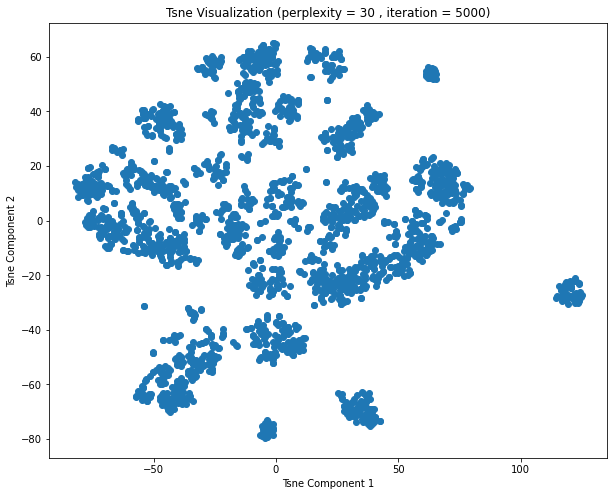

In [34]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 30 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

In [35]:
tsne = TSNE(n_components = 2, perplexity = 40, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



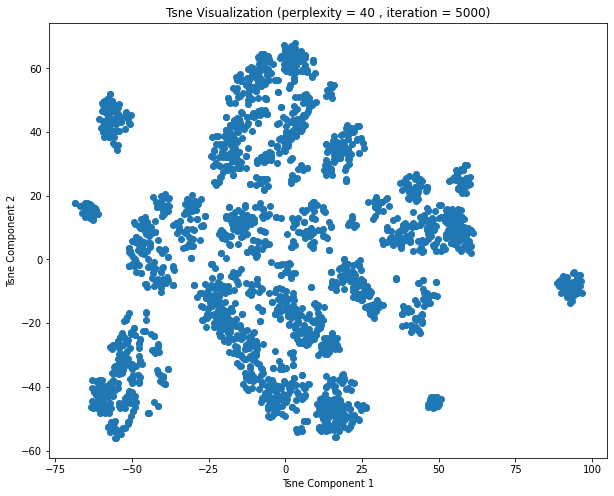

In [36]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 40 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

In [37]:
tsne = TSNE(n_components = 2, perplexity = 50, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



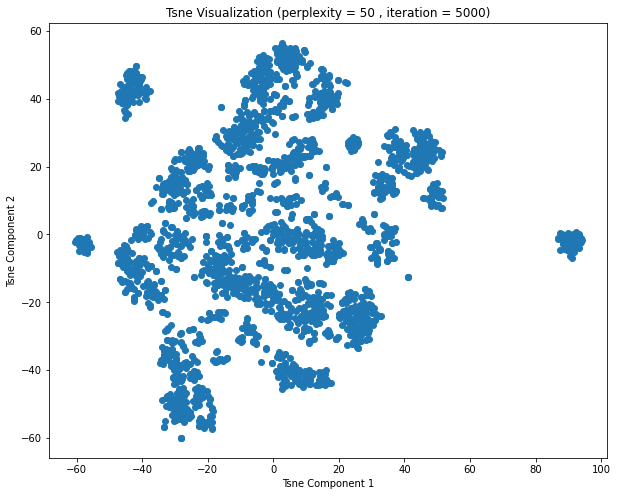

In [38]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 50 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

In [39]:
tsne = TSNE(n_components = 2, perplexity = 100, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



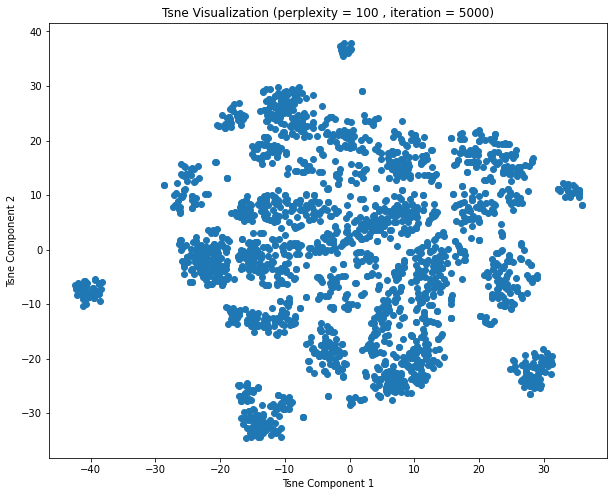

In [40]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results['Tsne component 1'], 
           y = df_results['Tsne component 2'])
ax.set_title('Tsne Visualization (perplexity = 100 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
plt.show()

## Performing Clustering Algorithm (Hierarchical Clustering, K-Means & DBSCAN)

In [41]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [42]:
def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

In [43]:
# Single Linkage, Average Linkage, Ward Linkage
sl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'single')
avg = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'average')
ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'ward')
model_1 = sl.fit(df_reduced.values)
model_2 = avg.fit(df_reduced.values)
model_3 = ward.fit(df_reduced.values)

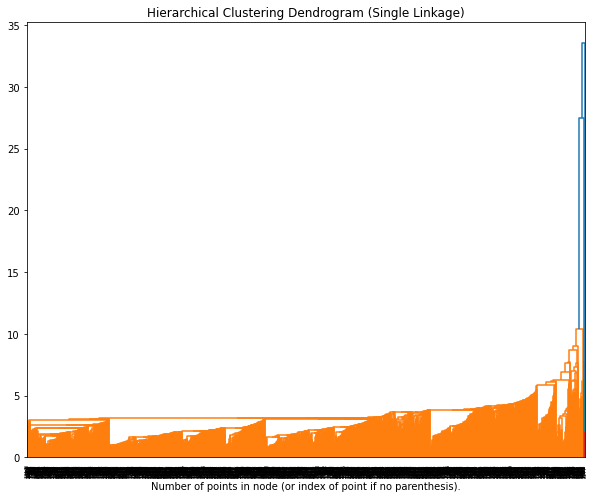

In [44]:
plt.figure(figsize = (10,8))
plot_dendrogram(model_1)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

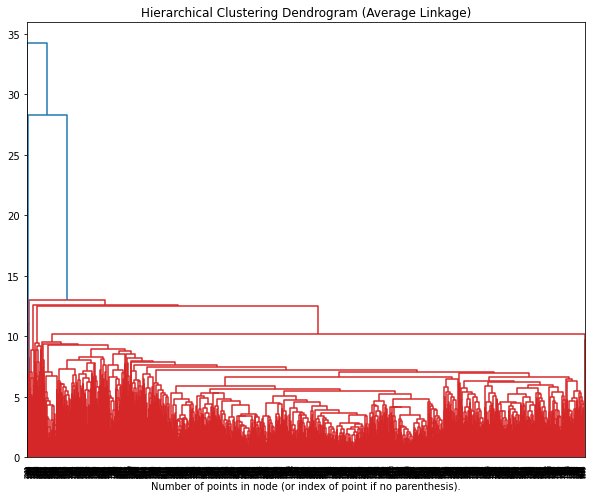

In [45]:
plt.figure(figsize = (10,8))
plot_dendrogram(model_2)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

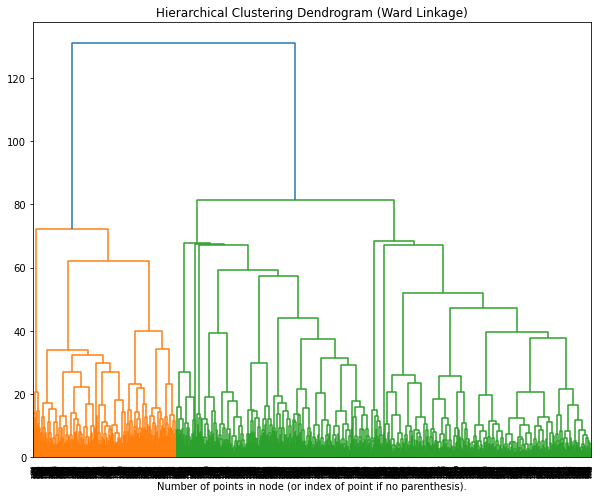

In [46]:
plt.figure(figsize = (10,8))
plot_dendrogram(model_3)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [47]:
## we will select Ward Linkage method to label our data with number of cluster = 2
ward = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
labels_ward  = ward.fit_predict(df_reduced.values)

In [48]:
tsne = TSNE(n_components = 2, perplexity = 50, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results = tsne.fit_transform(df_reduced.values)
df_results = pd.DataFrame()
df_results[['Tsne component 1', 'Tsne component 2']] = tsne_results
df_results['Cluster'] = list(map((lambda x : str(x)),labels_ward))

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



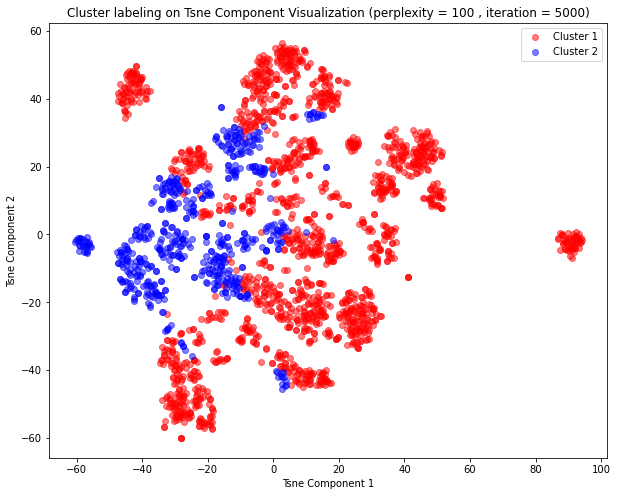

In [49]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x = df_results[df_results['Cluster'] == '0']['Tsne component 1'], 
           y = df_results[df_results['Cluster'] == '0']['Tsne component 2'],
          color = 'red', label = "Cluster 1", alpha = 0.5)
ax.scatter(x = df_results[df_results['Cluster'] == '1']['Tsne component 1'], 
           y = df_results[df_results['Cluster'] == '1']['Tsne component 2'],
          color = 'blue', label = "Cluster 2", alpha = 0.5)
ax.set_title('Cluster labeling on Tsne Component Visualization (perplexity = 100 , iteration = 5000)')
ax.set_xlabel('Tsne Component 1')
ax.set_ylabel('Tsne Component 2')
ax.legend()
plt.show()

In [50]:
k_clusters = np.arange(2,31)
inertia_ = []
silhouette_ = []
for k in k_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels_kmeans = kmeans.fit_predict(df_reduced.values)
    inertia_val = kmeans.inertia_
    silhouette_val = silhouette_score(df_reduced.values,labels_kmeans)
    inertia_.append(inertia_val)
    silhouette_.append(silhouette_val)

Elbow's Method Plot :


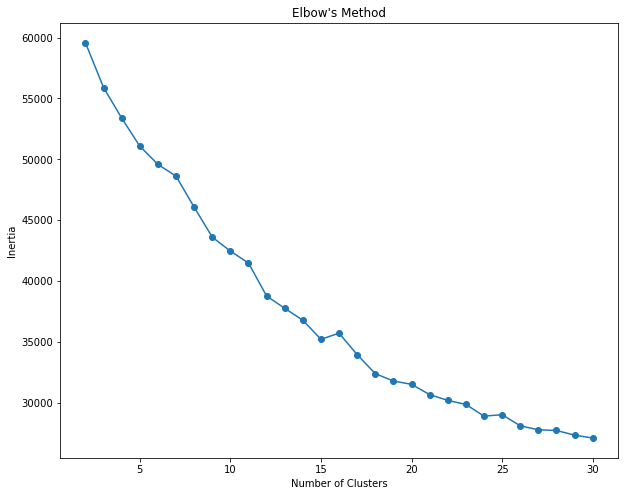

Silhoutte Scores :
'-1' for a worst score
'0' for overlaping clusters
'1' for a good score
Silhoutte score for 2 clusters	= 0.189
Silhoutte score for 3 clusters	= 0.131
Silhoutte score for 4 clusters	= 0.13
Silhoutte score for 5 clusters	= 0.149
Silhoutte score for 6 clusters	= 0.077
Silhoutte score for 7 clusters	= 0.085
Silhoutte score for 8 clusters	= 0.103
Silhoutte score for 9 clusters	= 0.151
Silhoutte score for 10 clusters	= 0.09
Silhoutte score for 11 clusters	= 0.103
Silhoutte score for 12 clusters	= 0.105
Silhoutte score for 13 clusters	= 0.127
Silhoutte score for 14 clusters	= 0.124
Silhoutte score for 15 clusters	= 0.119
Silhoutte score for 16 clusters	= 0.121
Silhoutte score for 17 clusters	= 0.111
Silhoutte score for 18 clusters	= 0.138
Silhoutte score for 19 clusters	= 0.141
Silhoutte score for 20 clusters	= 0.121
Silhoutte score for 21 clusters	= 0.134
Silhoutte score for 22 clusters	= 0.138
Silhoutte score for 23 clusters	= 0.138
Silhoutte score for 24 clusters	= 0.14


In [51]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(k_clusters, inertia_, marker = 'o')
ax.set_title("Elbow's Method")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")
print("="*50)
print("Elbow's Method Plot :")
print("="*50)
plt.show()
print("="*50)
print("Silhoutte Scores :")
print("'-1' for a worst score")
print("'0' for overlaping clusters")
print("'1' for a good score")
print("="*50)
for val1,val2 in zip(k_clusters,silhouette_):
    print(f'Silhoutte score for {val1} clusters\t= {np.round(val2,3)}')

In [52]:
kmeans = KMeans(n_clusters = 18, random_state = 42)
labels_kmeans = kmeans.fit_predict(df_reduced.values)

In [53]:
tsne_kmeans = TSNE(n_components = 2, perplexity = 50, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results_kmeans = tsne_kmeans.fit_transform(df_reduced.values)
df_results_kmeans = pd.DataFrame()
df_results_kmeans[['Tsne component 1', 'Tsne component 2']] = tsne_results_kmeans
df_results_kmeans['Cluster'] = list(map((lambda x : str(x)),labels_kmeans))

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



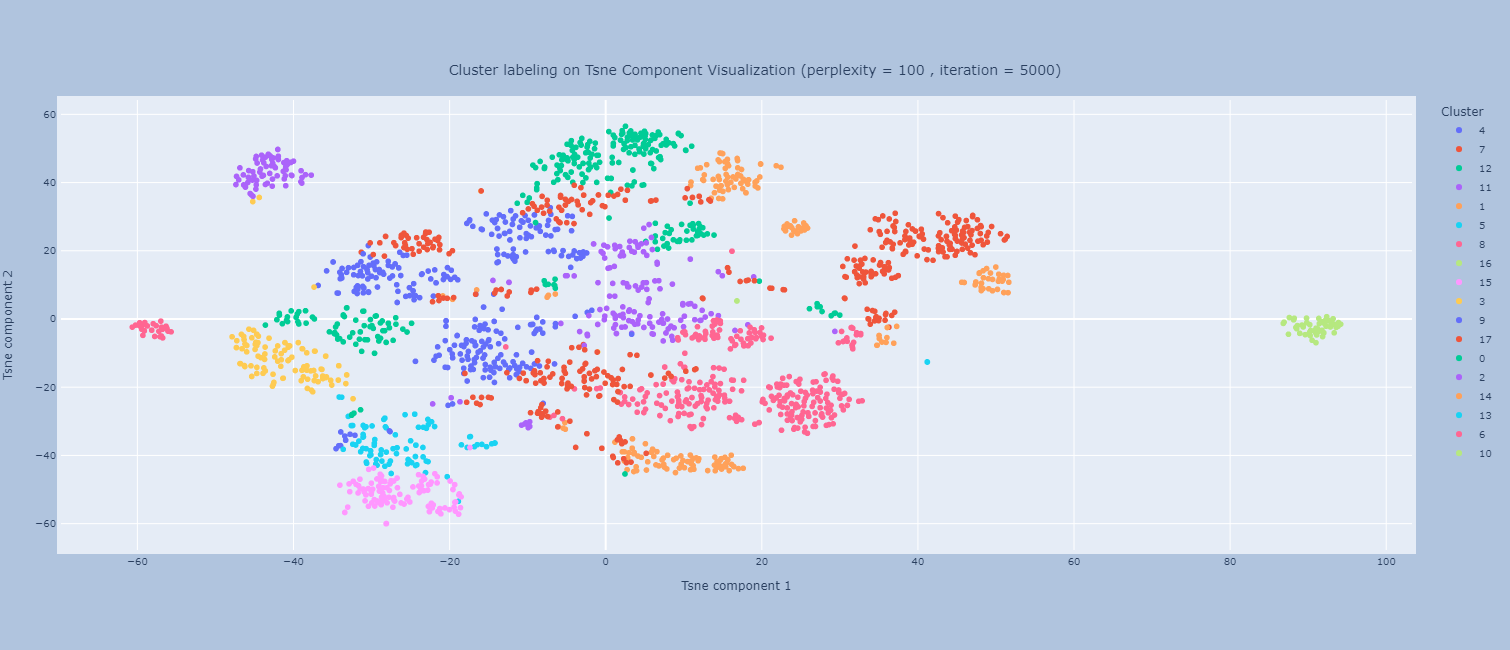

In [54]:
fig = px.scatter(df_results_kmeans, x = 'Tsne component 1', y = 'Tsne component 2', color = 'Cluster')
fig.update_layout( title={ 'text':"Cluster labeling on Tsne Component Visualization (perplexity = 100 , iteration = 5000)", 'y':0.9, 'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                  font = {'size' : 10},
                  autosize=False,width=650, height=650, 
                  margin=dict( l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue")
fig.show()

In [55]:
db = DBSCAN(eps = 1.4, min_samples= 4 ,n_jobs=-1)
labels_db = db.fit_predict(df_reduced.values)

In [56]:
tsne_db = TSNE(n_components = 2, perplexity = 50, random_state = 42 ,learning_rate = 'auto', n_iter = 5000 , n_jobs = -1)
tsne_results_db = tsne_db.fit_transform(df_reduced.values)
df_results_db = pd.DataFrame()
df_results_db[['Tsne component 1', 'Tsne component 2']] = tsne_results_db
df_results_db['Cluster'] = list(map((lambda x : str(x)),labels_db))

C:\Users\naufa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



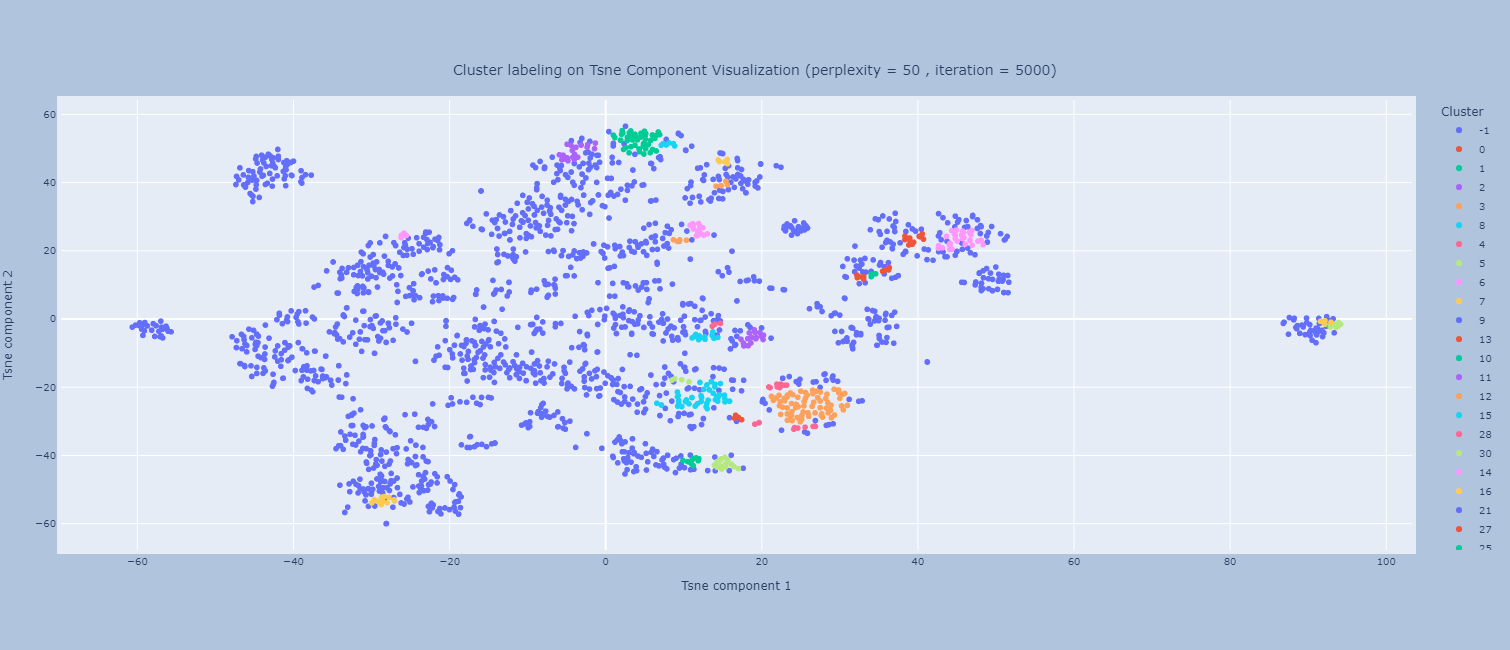

In [57]:
fig = px.scatter(df_results_db, x = 'Tsne component 1', y = 'Tsne component 2', color = 'Cluster')
fig.update_layout( title={ 'text':"Cluster labeling on Tsne Component Visualization (perplexity = 50 , iteration = 5000)", 'y':0.9, 'x':0.5,
                          'xanchor': 'center','yanchor': 'top'},
                  font = {'size' : 10},
                  autosize=False,width=650, height=650, 
                  margin=dict( l=50, r=50, b=100, t=100, pad=4), paper_bgcolor="LightSteelBlue")
fig.show()

In [58]:
new_data_ward = raw_data.copy()
new_data_ward['Cluster'] =  list(map((lambda x : str(x)),labels_ward))

In [59]:
display(new_data_ward.head())

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Enroll_time  \
0             0             0             0         0         1     9.906849   
1             0             0             0         0         0     8.400000   
2             0             0             0         0         0     8.945205   
3             0             0             0         0         0     8.471233   
4             0             0             0         0         0     8.531507   

   Age  Cluster  
0   65        1  
1   68        0  
2   57        1  
3   38        0  
4   41        0  

[5 rows x 30 columns]

In [60]:
print(new_data_ward.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [61]:
grouped_education = new_data_ward.groupby(['Cluster','Education'])['ID'].count()
print(grouped_education)

Cluster  Education 
0        2n Cycle      155
         Basic          54
         Graduation    832
         Master        266
         PhD           358
1        2n Cycle       48
         Graduation    295
         Master        104
         PhD           128
Name: ID, dtype: int64


In [62]:
grouped_marital = new_data_ward.groupby(['Cluster','Marital_Status'])['ID'].count()
print(grouped_marital)

Cluster  Marital_Status
0        Alone               3
         Divorced          209
         Married           608
         Single            354
         Together          413
         Widow              76
         YOLO                2
1        Absurd              2
         Divorced           23
         Married           256
         Single            126
         Together          167
         Widow               1
Name: ID, dtype: int64


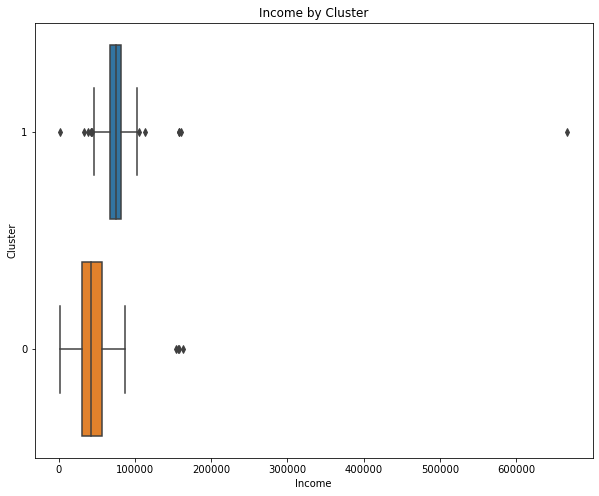

In [63]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(x = 'Income', y = 'Cluster', data = new_data_ward, ax=ax)
plt.title('Income by Cluster')
plt.show()

In [64]:
from scipy.stats import iqr

In [65]:
def remove_outlier(data):
    """This funtion was created to remove outlier using IQR method"""
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr_ = iqr(data.values)
    lower_bound = q1 - 1.5*iqr_
    upper_bound = q3 + 1.5*iqr_
    condition = (data >= lower_bound) & (data <= upper_bound)
    return  condition

In [85]:
cluster_1_income = new_data_ward[new_data_ward['Cluster'] == "1"][["Cluster","Income"]]
cluster_2_income = new_data_ward[new_data_ward['Cluster'] == "0"][["Cluster","Income"]]
cluster_1_income = cluster_1_income[remove_outlier(cluster_1_income["Income"])]
cluster_2_income = cluster_2_income[remove_outlier(cluster_2_income["Income"])]

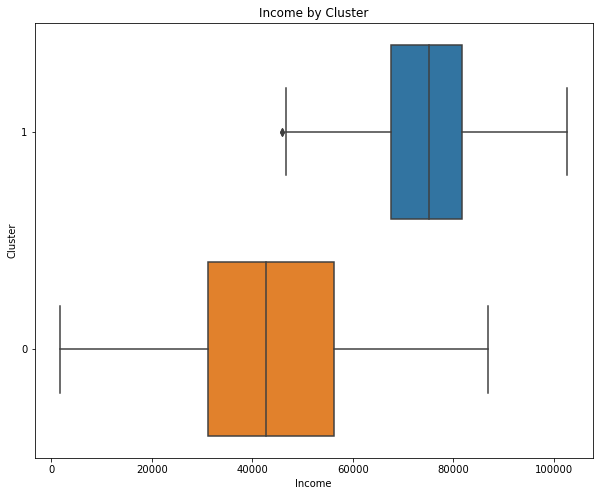

In [86]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(x = 'Income', y = 'Cluster', data = pd.concat([cluster_1_income,cluster_2_income], axis = 0, ignore_index = True), ax=ax)
plt.title('Income by Cluster')
plt.show()

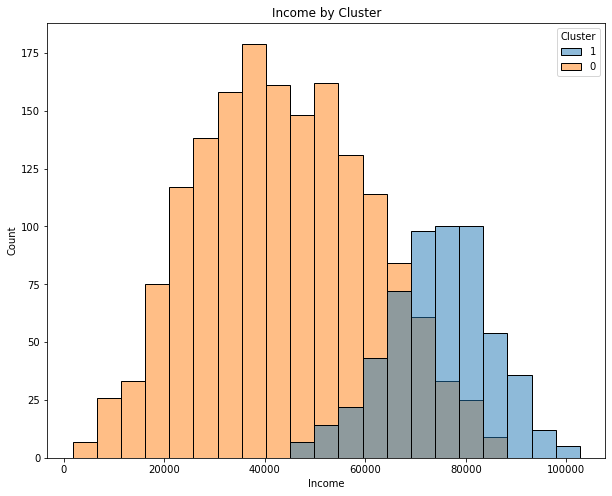

In [87]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(x = 'Income', hue = 'Cluster', data = pd.concat([cluster_1_income,cluster_2_income], axis = 0, ignore_index = True), ax=ax)
plt.title('Income by Cluster')
plt.show()

In [88]:
from scipy.stats import t

In [89]:
# From the boxplot and the histogram above, we can see that the 2 clusters have a different average of income or we can say that 2 cluster come from a different distribution.
# However, Is the difference statistically significance?
# lets conduct a T test 2 population
print(f'Number of sample for cluster 1 = {cluster_1_income.shape[0]}')
print(f'Number of sample for cluster 0 = {cluster_2_income.shape[0]}')
print('Since each sample is large enough, by the central limit theorem we can proceed to use T-test for testing significance difference of two mean population')
print('='*50)
print('First we state the hypothesis :')
print('H0 : mu_1 - mu_2 = 0')
print('H1 : mu_2 - mu_2 is not 0')

Number of sample for cluster 1 = 563
Number of sample for cluster 0 = 1661
Since each sample is large enough, by the central limit theorem we can proceed to use T-test for testing significance difference of two mean population
First we state the hypothesis :
H0 : mu_1 - mu_2 = 0
H1 : mu_2 - mu_2 is not 0


In [90]:
mean_1 = cluster_1_income["Income"].mean()
mean_0 = cluster_2_income["Income"].mean()
n_1 = cluster_1_income.shape[0]
n_0 = cluster_2_income.shape[0]
s_1 = np.var(cluster_1_income["Income"],ddof=1)
s_0 = np.var(cluster_2_income["Income"], ddof = 1)
print(f"Number of sample for cluster 1 = {n_1}")
print(f"Number of sample for cluster 0 = {n_0}")
print(f"Mean of cluster 1 = {np.round(mean_1,3)}")
print(f"Mean of cluster 0 = {np.round(mean_0,3)}")
print(f"Variance for  cluster 1 = {np.round(s_1,3)}")
print(f"Variance for cluster 2 = {np.round(s_0,3)}")

Number of sample for cluster 1 = 563
Number of sample for cluster 0 = 1661
Mean of cluster 1 = 74619.778
Mean of cluster 0 = 43846.721
Variance for  cluster 1 = 109619345.272
Variance for cluster 2 = 287448123.848


In [91]:
t_stats= (mean_1 - mean_0)/(np.sqrt((s_1/n_1) + (s_0/n_0)))
df_ = ((s_1/n_1) + (s_0/n_0))**2/((s_1/n_1)**2/(n_1-1) + (s_0/n_0)**2/(n_0-1))
pval = 2*t.cdf(-t_stats,df = df_)
print(f"Test Statistic for t-distribution = {t_stats}")
print(f"Degree of freedom = {df_}")
print(f"P-value  = {pval}")
print("Since the P value is less than alpha (0.05), we caan reject the null hypothesis that the mean difference is 0. So, the 2 clusters (1 and 0)| come from a different distribution")

Test Statistic for t-distribution = 50.74422130574035
Degree of freedom = 1581.912226843411
P-value  = 0.0
Since the P value is less than alpha (0.05), we caan reject the null hypothesis that the mean difference is 0. So, the 2 clusters (1 and 0)| come from a different distribution


In [92]:
from scipy.stats import ttest_ind as ttest

In [93]:
# Let's verfiy the result with scipy t test for 2 independent samples and unequal variance
result = ttest(cluster_1_income["Income"],cluster_2_income["Income"], equal_var= False, random_state= 42, alternative= 'two-sided')
print(f"Test Statistics = {result[0]}")
print(f"P Value = {result[1]}")

Test Statistics = 50.74422130574036
P Value = 0.0


In [94]:
print(new_data_ward.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Enroll_time', 'Age',
       'Cluster'],
      dtype='object')


In [95]:
grouped_amount = new_data_ward.groupby("Cluster")[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()
display(grouped_amount)

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0          319008      22541           130291            31382   
1          361808      36376           243677            52675   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                   23083         56302  
1                   37538         42307

In [78]:
grouped_buy = new_data_ward.groupby("Cluster")[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()
display(grouped_buy)

NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0                     4302             6068                 2653   
1                      906             3082                 3310   

         NumStorePurchases  NumWebVisitsMonth  
Cluster                                        
0                     8191              10080  
1                     4779               1829

In [79]:
grouped_binary = new_data_ward.groupby("Cluster")[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                                  'Complain', 'Response']].mean()
display(grouped_binary)

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                         
0            0.011411      0.000000      0.074474      0.053453      0.004805   
1            0.217391      0.052174      0.067826      0.135652      0.269565   

         Complain  Response  
Cluster                      
0        0.012613  0.109309  
1        0.000000  0.264348

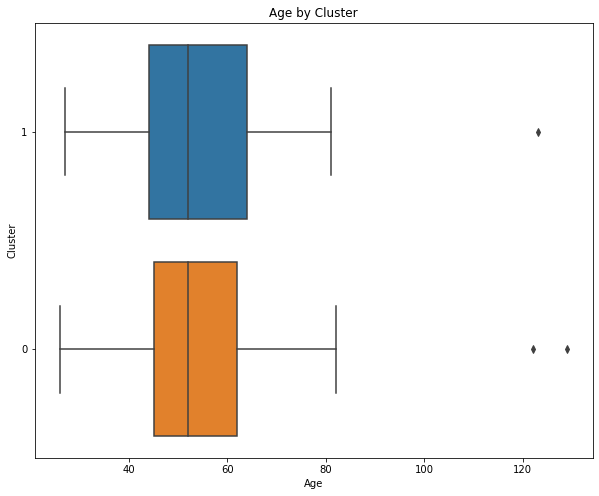

In [80]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(x = 'Age', y = 'Cluster', data = new_data_ward, ax=ax)
plt.title('Age by Cluster')
plt.show()

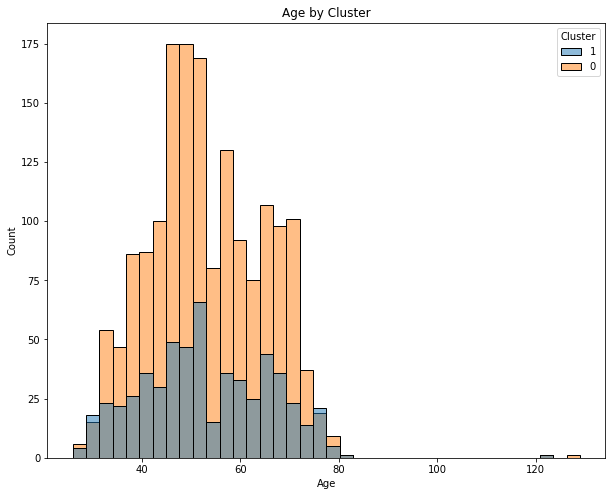

In [82]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(x = 'Age', hue= 'Cluster', data = new_data_ward, ax=ax)
plt.title('Age by Cluster')
plt.show()

In [84]:
# From the boxplot and the histogram above, we want to see if the age distribution between two clusters are different.
# lets conduct a T test 2 population
cluster_0_age = new_data_ward[new_data_ward["Cluster"] == "0"][["Age"]]
cluster_1_age = new_data_ward[new_data_ward["Cluster"] == "1"][["Age"]]
print(f'Number of sample for cluster 0 = {cluster_0_age.shape[0]}')
print(f'Number of sample for cluster 1 = {cluster_1_age.shape[0]}')
print('Since each sample is large enough, by the central limit theorem we can proceed to use T-test for testing significance difference of two mean population')
print('='*50)
print('First we state the hypothesis :')
print('H0 : mu_1 - mu_2 = 0')
print('H1 : mu_2 - mu_2 is not 0')

Number of sample for cluster 0 = 1665
Number of sample for cluster 1 = 575
Since each sample is large enough, by the central limit theorem we can proceed to use T-test for testing significance difference of two mean population
First we state the hypothesis :
H0 : mu_1 - mu_2 = 0
H1 : mu_2 - mu_2 is not 0


In [96]:
mean_1 = cluster_1_age["Age"].mean()
mean_0 = cluster_0_age["Age"].mean()
n_1 = cluster_1_age.shape[0]
n_0 = cluster_0_age.shape[0]
s_1 = np.var(cluster_1_age["Age"],ddof=1)
s_0 = np.var(cluster_0_age["Age"], ddof = 1)
print(f"Number of sample for cluster 1 = {n_1}")
print(f"Number of sample for cluster 0 = {n_0}")
print(f"Mean of cluster 1 = {np.round(mean_1,3)}")
print(f"Mean of cluster 0 = {np.round(mean_0,3)}")
print(f"Variance for  cluster 1 = {np.round(s_1,3)}")
print(f"Variance for cluster 2 = {np.round(s_0,3)}")

Number of sample for cluster 1 = 575
Number of sample for cluster 0 = 1665
Mean of cluster 1 = 53.111
Mean of cluster 0 = 53.223
Variance for  cluster 1 = 167.988
Variance for cluster 2 = 135.295


In [100]:
t_stats= (mean_1 - mean_0)/(np.sqrt((s_1/n_1) + (s_0/n_0)))
df_ = ((s_1/n_1) + (s_0/n_0))**2/((s_1/n_1)**2/(n_1-1) + (s_0/n_0)**2/(n_0-1))
pval = 2*t.cdf(t_stats,df = df_)
print(f"Test Statistic for t-distribution = {t_stats}")
print(f"Degree of freedom = {df_}")
print(f"P-value  = {pval}")
print("Since the P value is bigger than alpha (0.05), we fail to reject the null hypothesis that the mean difference is 0. So, the 2 clusters (1 and 0) come from a same distribution")

Test Statistic for t-distribution = -0.18249611454870182
Degree of freedom = 913.3318856181652
P-value  = 0.8552339019501101
Since the P value is bigger than alpha (0.05), we fail to reject the null hypothesis that the mean difference is 0. So, the 2 clusters (1 and 0) come from a same distribution


In [101]:
# Let's verfiy the result with scipy t test for 2 independent samples and unequal variance
result = ttest(cluster_1_age["Age"],cluster_0_age["Age"], equal_var= False, random_state= 42, alternative= 'two-sided')
print(f"Test Statistics = {result[0]}")
print(f"P Value = {result[1]}")

Test Statistics = -0.18249611454870182
P Value = 0.8552339019501101
